In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# read data into a DataFrame
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [4]:
# print the shape of the DataFrame
data.shape

(200, 4)

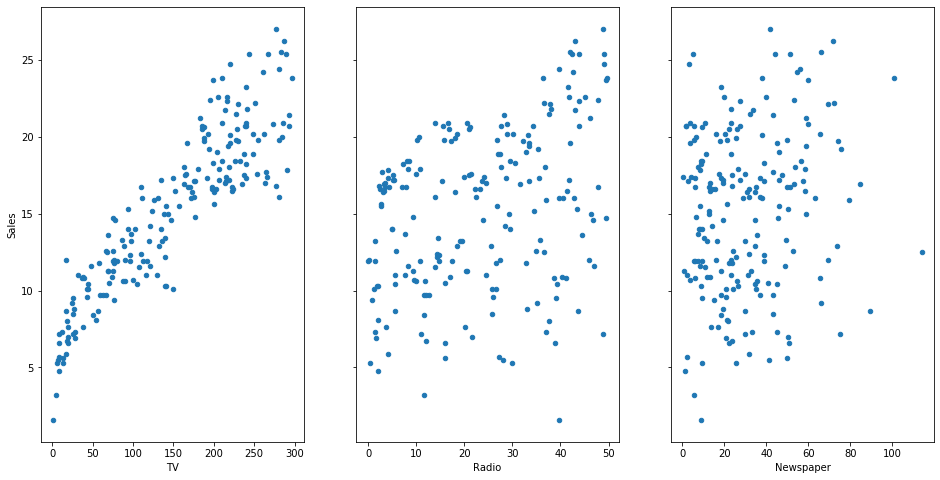

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

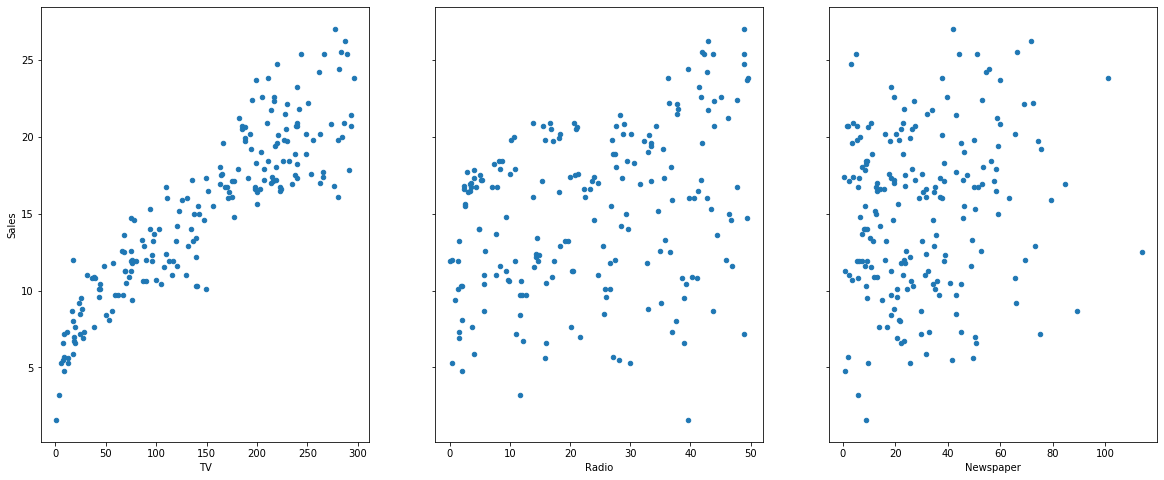

In [6]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(20, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [7]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

6.974821488229891
[0.05546477]


In [8]:
# create X and y
feature_cols = ['Radio']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

12.235721966369235
[0.12443166]


In [9]:
# create X and y
feature_cols = ['Newspaper']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

13.959548653554414
[0.038324]


In [10]:
#Using the Model for Prediction
# manually calculate the prediction
6.97482 + 0.055467*50

9.74817

In [11]:
7.15472 + 0.0377807*75

9.9882725

In [12]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [100]})
X_new.head()

,TV
0,100


In [13]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [100]})
X_new.tail()

,TV
0,100


In [14]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'Radio': [100]})
X_new.head()

,Radio
0,100


In [15]:
X_new = pd.DataFrame({'TV': [100]})
X_new.head()

,TV
0,100


In [16]:
lm.predict(X_new)

array([17.79194816])

In [17]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'Radio': [data.TV.min(), data.TV.max()]})
X_new.head()

,Radio
0,0.7
1,296.4


In [18]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([13.98637545, 25.3187808 ])

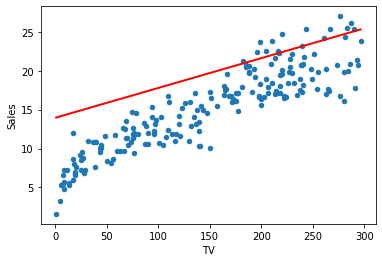

In [19]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [20]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [21]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

In [22]:
# print the R-squared value for the model
lm.rsquared

0.8121757029987414

In [23]:
#Multiple Linear Regression
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

4.62512407880865
[0.05444578 0.10700123 0.00033566]


In [24]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           8.13e-99
Time:                        17:45:05   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.9025896186081139

In [26]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.9025912899684558